In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

In [2]:
# Load and prepare data
data = pd.read_csv("../../data/cyclohexane.csv", header=0)

X = data.drop("solvent", axis=1)
best_sample = X.iloc[0].to_numpy().reshape(-1, 1)

In [3]:
plt.rcParams['font.size'] = 12
def build_plot():
    xticks = np.linspace(0, X.shape[1]-1, 6, dtype=int)
    xlabels = X.columns[xticks].astype(float).astype(int).values

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.ylabel("Intensity (a.u)")
    plt.xlabel("Raman Shift (cm$^{-1}$)")
    plt.xlim([-20, 3296])
    plt.xticks(xticks, labels=xlabels)
    plt.grid(False)
    return fig

## Example Raw Spectra

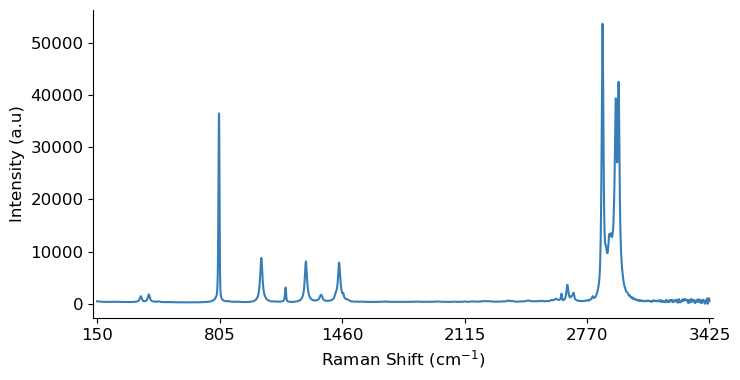

In [4]:
_ = build_plot()
plt.plot(best_sample, "#377eb8");

## Example Batch of Raw Spectra

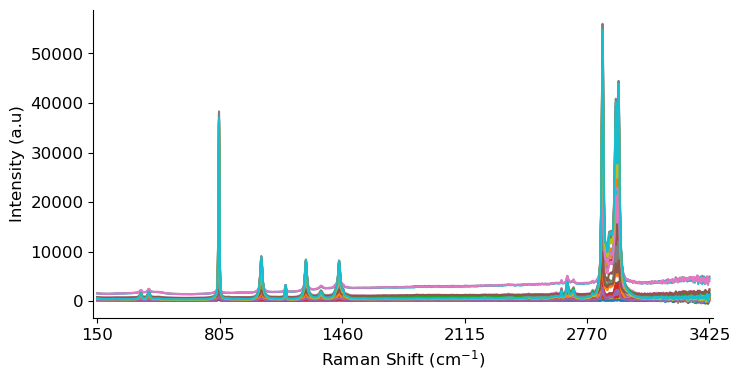

In [5]:
_ = build_plot()
plt.plot(X.iloc[:50, :].T); # semicolon to suppress matplotlib output, can also assign it as _ = plot(.)

## Min-Max Normalisation with Custom Range

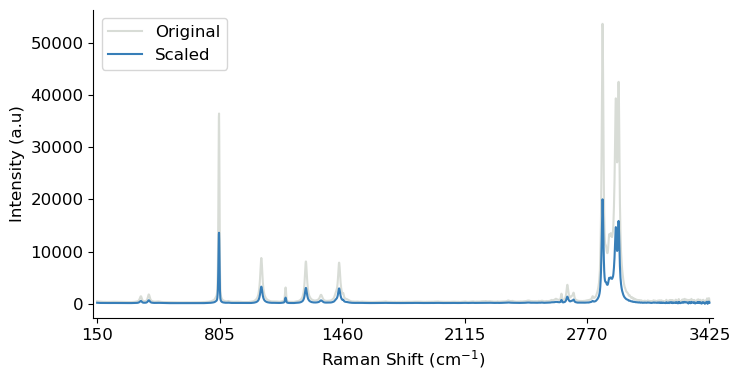

In [6]:
min_max_scaler = MinMaxScaler(feature_range=(0, 20000))
min_max_sample = min_max_scaler.fit_transform(best_sample)

_ = build_plot()
plt.plot(best_sample, "#d8dcd6", label="Original");
plt.plot(min_max_sample, "#377eb8",  label="Scaled");
plt.legend();

## Standard Min-Max Normalisation

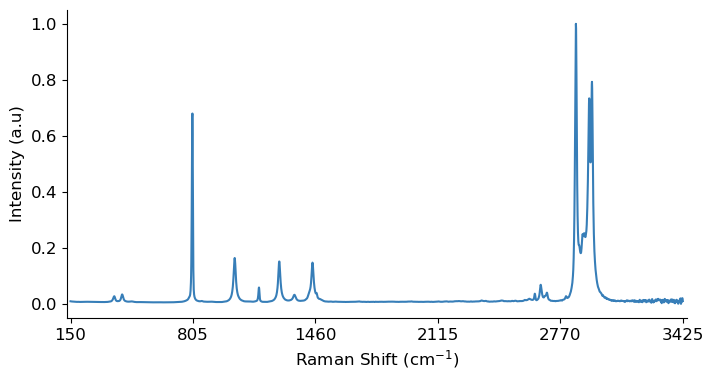

In [7]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_sample = min_max_scaler.fit_transform(best_sample)

_ = build_plot()
plt.plot(min_max_sample, "#377eb8",  label="Scaled");

## Z-Score Normalisation

Applying Z-score normalization (standardization) to an entire batch of spectral data can be problematic because it distorts the magnitudes and shape of the spectra, as demonstrated below.

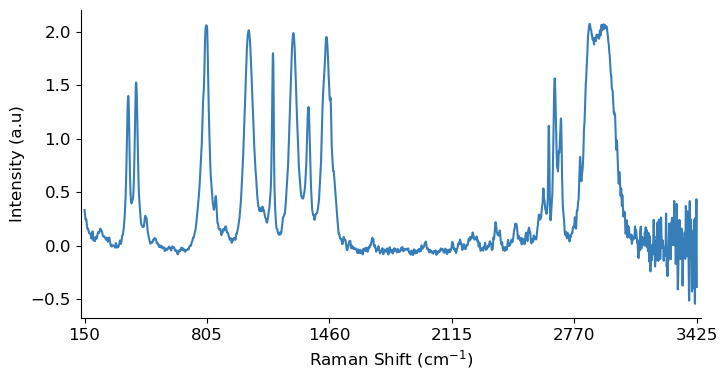

In [8]:
std_scaler = StandardScaler()
std_sample = std_scaler.fit_transform(X)

_ = build_plot()
plt.plot(std_sample[0], "#377eb8");

## Single Sample Standardisation

It is more appropriate to scale a spectrum by using its individual mean and standard deviation, as performed by the Standard Normal Variate method. Standard Normal Variate (SNV) normalization is a much better approach for spectral data.

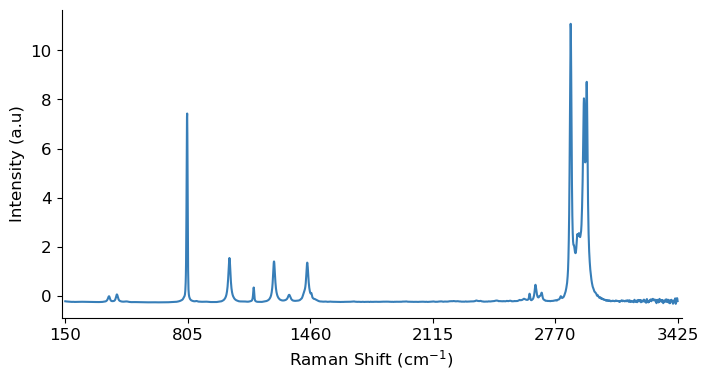

In [9]:
std_sample = StandardScaler().fit_transform(best_sample)

_ = build_plot()
plt.plot(std_sample, "#377eb8");